In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model as lm
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [2]:
en = pd.read_csv("C:\\Users\\Dell\\Downloads\\insurance_data.csv")
en

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1
5,56,1
6,55,0
7,60,1
8,62,1
9,61,1


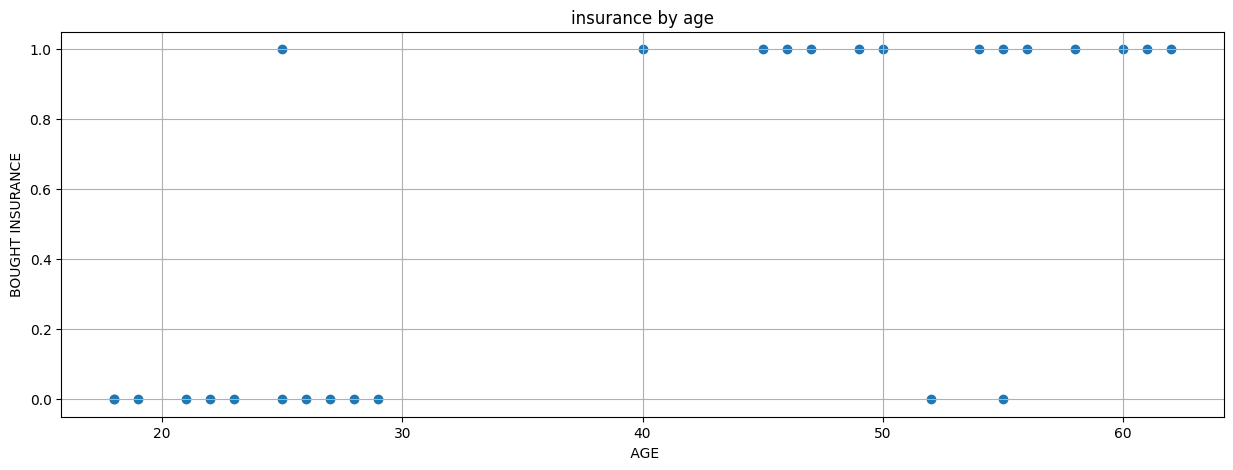

In [3]:
plt.figure(figsize=(15, 5))
x = en['age']
y = en['bought_insurance']
plt.title('insurance by age')
plt.xlabel(' AGE')
plt.ylabel('BOUGHT INSURANCE')
plt.grid(True)
plt.scatter(x, y)

In [4]:
rg = lm.LinearRegression()
logreg = LogisticRegression()
X = en[['age']].values
y = en['bought_insurance'].values
rg.fit(en[['bought_insurance']], en.age)

LinearRegression()

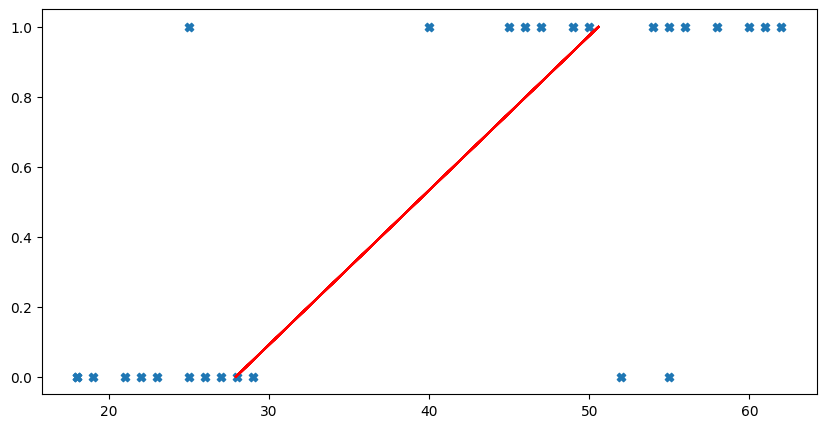

In [5]:
plt.figure(figsize=(10, 5))
plt.scatter(en['age'], en['bought_insurance'], marker='X')
plt.plot(rg.predict(en[['bought_insurance']]),
         en['bought_insurance'], color='r')

In [9]:
logreg.fit(en[['bought_insurance']], en.age)
coef = logreg.coef_[1]
intercept = logreg.intercept_[1]

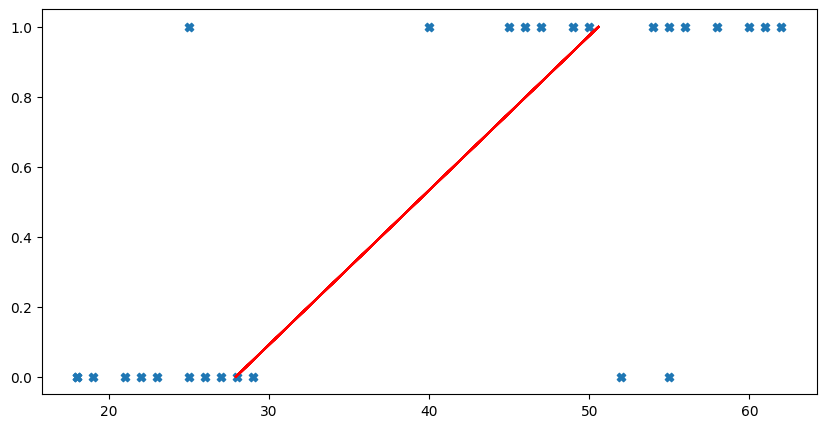

In [7]:
plt.figure(figsize=(10, 5))
plt.scatter(en['age'], en['bought_insurance'], marker='X')
plt.plot(rg.predict(en[['bought_insurance']]),
         en['bought_insurance'], color='r')

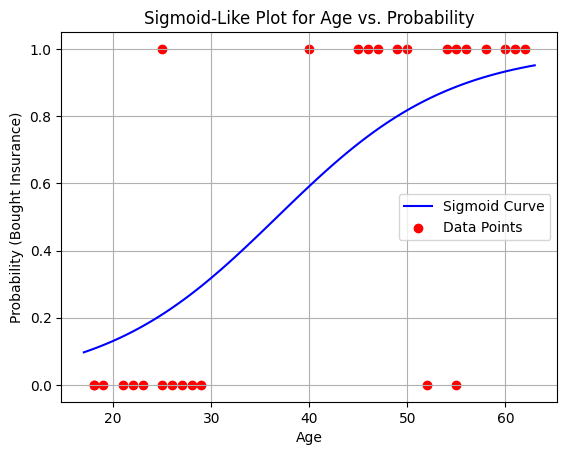

In [22]:
# Extract the columns you want to use for modeling
X = en[['age']].values
y = en['bought_insurance'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Fit a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

coef = model.coef_[0][0]
intercept = model.intercept_[0]

# Define the sigmoid function


def sigmoid(x):
    z = (coef * x) + intercept
    return 1 / (1 + np.exp(-z))


# Generate input values within the desired range
start = min(X)[0] - 1
end = max(X)[0] + 1
num_points = 100  # Increase the number of points for a smoother plot
x = np.linspace(start, end, num_points)

# Calculate sigmoid values using the sigmoid function
y_sigmoid = sigmoid(x)

# Plot the sigmoid-like curve
plt.plot(x, y_sigmoid, color='blue', label='Sigmoid Curve')
plt.scatter(X, y, color='red', marker='o', label='Data Points')
plt.xlabel('Age')
plt.ylabel('Probability (Bought Insurance)')
plt.title('Sigmoid-Like Plot for Age vs. Probability')
plt.grid(True)
plt.legend()
# plt.ylim(0, 1)  # Set y-axis limits to [0, 1]
plt.show()

In [23]:
# Predict probabilities on the test set
y_prob = model.predict_proba(X_test)[:, 1]

# Threshold probabilities to make binary predictions (0 or 1)
y_pred = (y_prob > 0.5).astype(int)

# Calculate accuracy and display classification report
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(confusion)
print("Classification Report:")
print(classification_rep)

Accuracy: 1.0
Confusion Matrix:
[[4 0]
 [0 2]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         2

    accuracy                           1.00         6
   macro avg       1.00      1.00      1.00         6
weighted avg       1.00      1.00      1.00         6

